# Classification

A naive classifier model is one that does not use any sophistication in order to make a
prediction, typically making a random or constant prediction. Such models are naive because
they don't use any knowledge about the domain or any learning in order to make a prediction.
The performance of a baseline classifier on a classification task provides a lower bound on the
expected performance of all other models on the problem. For example, if a classification model
performs better than a naive classifier, then it has some skill. If a classifier model performs
worse than the naive classifier, it does not have any skill. What classifier should be used as the
naive classifier? This is a common area of confusion for beginners, and different naive classifiers
are adopted. Some common choices include:
- Predict a random class.
- Predict a randomly selected class from the training dataset.
- Predict the majority class from the training dataset.

In [3]:
# example of a majority class naive classifier
from scipy.stats import mode
from sklearn.metrics import accuracy_score
# predict the majority class
def majority_class(y):
    return mode(y)[0]
# define dataset
class0 = [0 for _ in range(25)]
class1 = [1 for _ in range(75)]
y = class0 + class1
# make predictions
yhat = [majority_class(y) for _ in range(len(y))]
# calculate accuracy
accuracy = accuracy_score(y, yhat)
print('Accuracy: %.3f' % accuracy)

#we should use this model as the naive baseline classifier to evaluate 
# other complex models, 

Accuracy: 0.750


In fact, the Sklearn DummyClassifier is 
exible and allows the other two naive classifiers to be used.
Specifically, setting strategy to 'uniform' will perform the random guess strategy that we
tested first, and setting strategy to 'stratified' will perform the randomly selected class
strategy that we tested second.
- Random Guess: Set the strategy argument to 'uniform'.
- Select Random Class: Set the strategy argument to 'stratified'.
- Majority Class: Set the strategy argument to 'most frequent'.

In [4]:
from numpy import asarray
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
# define dataset
X = asarray([0 for _ in range(100)])
class0 = [0 for _ in range(25)]
class1 = [1 for _ in range(75)]
y = asarray(class0 + class1)
# reshape data for sklearn
X = X.reshape((len(X), 1))
# define model
model = DummyClassifier(strategy='most_frequent')
# fit model
model.fit(X, y)
# make predictions
yhat = model.predict(X)
# calculate accuracy
accuracy = accuracy_score(y, yhat)
print('Accuracy: %.3f' % accuracy)

Accuracy: 0.750


#### Probability Scoring Metrics

methods for the
evaluation of the accuracy of predicted probabilities are referred to as scoring rules or scoring
functions.

**Log-loss**

The log loss can be implemented in Python using the log loss() function in scikit-learn.
In the binary classification case, the function takes a list of true outcome values and a list of
probabilities as arguments and calculates the average log loss for the predictions. We can make
a single log loss score concrete with an example. Given a specific known outcome of 0, we can
predict values of 0.0 to 1.0 in 0.01 increments (101 predictions) and calculate the log loss for
each. The result is a curve showing how much each prediction is penalized as the probability
gets further away from the expected value. We can repeat this for a known outcome of 1 and
see the same curve in reverse. The complete example is listed below.

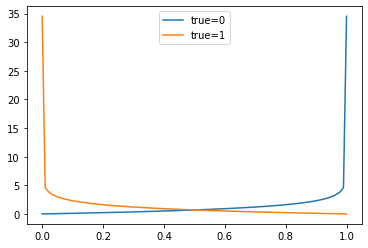

In [6]:
# plot impact of log loss for single forecasts
from sklearn.metrics import log_loss
from matplotlib import pyplot
# predictions as 0 to 1 in 0.01 increments
yhat = [x*0.01 for x in range(0, 101)]
# evaluate predictions for a 0 true value
losses_0 = [log_loss([0], [x], labels=[0,1]) for x in yhat]
# evaluate predictions for a 1 true value
losses_1 = [log_loss([1], [x], labels=[0,1]) for x in yhat]
# plot input to loss
pyplot.plot(yhat, losses_0, label='true=0')
pyplot.plot(yhat, losses_1, label='true=1')
pyplot.legend()
pyplot.show()

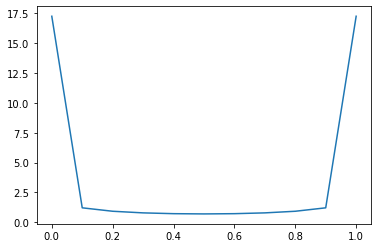

In [7]:
# plot impact of log loss with balanced datasets
from sklearn.metrics import log_loss
from matplotlib import pyplot
# define an imbalanced dataset
testy = [0 for x in range(50)] + [1 for x in range(50)]
# loss for predicting different fixed probability values
predictions = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
losses = [log_loss(testy, [y for x in range(len(testy))]) for y in predictions]
# plot predictions vs loss
pyplot.plot(predictions, losses)
pyplot.show()

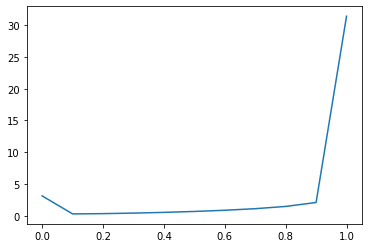

In [8]:
# plot impact of log loss with imbalanced datasets
from sklearn.metrics import log_loss
from matplotlib import pyplot
# define an imbalanced dataset
testy = [0 for x in range(100)] + [1 for x in range(10)]
# loss for predicting different fixed probability values
predictions = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
losses = [log_loss(testy, [y for x in range(len(testy))]) for y in predictions]
# plot predictions vs loss
pyplot.plot(predictions, losses)
pyplot.show()

**Brier Score**

The Brier score, named for Glenn Brier, calculates the mean squared error between predicted
probabilities and the expected values. The score summarizes the magnitude of the error in the
probability predictions. The error score is always between 0.0 and 1.0, where a model with
perfect skill has a score of 0.0. Predictions that are further away from the expected probability
are penalized, but less severely as in the case of log loss. The skill of a model can be summarized
as the average Brier score across all probabilities predicted for a test dataset.
The Brier score can be calculated in Python using the brier score loss() function in
scikit-learn. It takes the true class values (0, 1) and the predicted probabilities for all examples
in a test dataset as arguments and returns the average Brier score. We can evaluate the impact
of prediction errors by comparing the Brier score for single probability predictions in increasing
error from 0.0 to 1.0. The complete example is listed below.

In [12]:
from sklearn.metrics import brier_score_loss
from matplotlib import pyplot

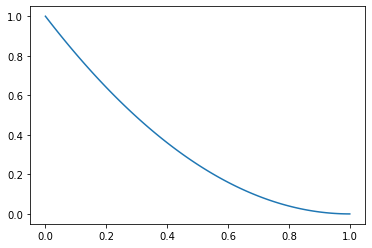

In [15]:
# predictions as 0 to 1 in 0.01 increments
yhat = [x*0.01 for x in range(0, 101)]
# evaluate predictions for a 1 true value
losses = [brier_score_loss([1], [x], pos_label=[1]) for x in yhat]
# plot input to loss
pyplot.plot(yhat, losses)
pyplot.show()

Model skill is reported as the average Brier across the predictions in a test dataset. As with
log loss, we can expect that the score will be suitable with a balanced dataset and misleading
when there is a large imbalance between the two classes in the test set. We can demonstrate
this by comparing the distribution of loss values when predicting dierent constant probabilities
for a balanced and an imbalanced dataset. First, the example below predicts values from 0.0 to
1.0 in 0.1 increments for a balanced dataset of 50 examples of class 0 and 1.

In [19]:
import numpy as np

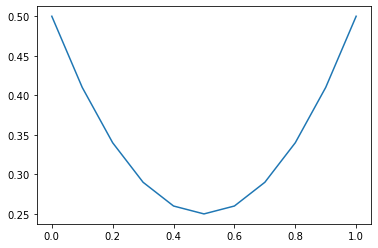

In [27]:
testy = [0]*50 + [1]*50
predictions = np.arange(0,1.1,0.1)

losses = [brier_score_loss(testy,[y for x in range(len(testy))]) for y in predictions]
pyplot.plot(predictions,losses)
pyplot.show()

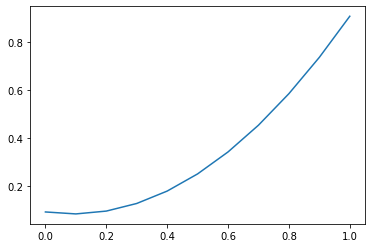

In [28]:
testy = [0]*100 + [1]*10
predictions = np.arange(0,1.1,0.1)

losses = [brier_score_loss(testy,[y for x in range(len(testy))]) for y in predictions]
pyplot.plot(predictions,losses)
pyplot.show()

**roc curve**

A predicted probability for a binary (two-class) classification problem can be interpreted with
a threshold. The threshold defines the point at which the probability is mapped to class 0
versus class 1, where the default threshold is 0.5. Alternate threshold values allow the model to
be tuned for higher or lower false positives and false negatives. Tuning the threshold by the
operator is particularly important on problems where one type of error is more or less important
than another or when a model is makes disproportionately more or less of a specific type of
error.
The Receiver Operating Characteristic, or ROC, curve is a plot of the true positive rate
versus the false positive rate for the predictions of a model for multiple thresholds between 0.0
and 1.0. Predictions that have no skill for a given threshold are drawn on the diagonal of the plot
from the bottom left to the top right. This line represents no-skill predictions for each threshold.
Models that have skill have a curve above this diagonal line that bows towards the top left
corner. Below is an example of fitting a logistic regression model on a binary classification
problem and calculating and plotting the ROC curve for the predicted probabilities on a test
set of 500 new data instances.

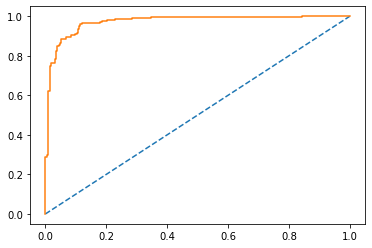

In [35]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve


X,y = make_classification(n_samples = 1000,n_classes=2)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

model = LogisticRegression(solver='lbfgs')
model.fit(trainX,trainy)

probss = model.predict_proba(testX)
#keep probs for positive outcomes only
probs = probss[:,1]

fpr,tpr,thresholds = roc_curve(testy,probs)

#plot no skill
pyplot.plot([0,1],[0,1],linestyle='--')
pyplot.plot(fpr,tpr)
pyplot.show()

The integrated area under the ROC curve, called AUC or ROC AUC, provides a measure of
the skill of the model across all evaluated thresholds. An AUC score of 0.5 suggests no skill,
e.g. a curve along the diagonal, whereas an AUC of 1.0 suggests perfect skill, all points along
the left y-axis and top x-axis toward the top left corner. An AUC of 0.0 suggests perfectly
incorrect predictions. Predictions by models that have a larger area have better skill across
the thresholds, although the specific shape of the curves between models will vary, potentially
offering opportunity to optimize models by a pre-chosen threshold. Typically, the threshold is
chosen by the operator after the model has been prepared.

The AUC can be calculated in Python using the roc auc score() function in scikit-learn.
This function takes a list of true output values and predicted probabilities as arguments and
returns the ROC AUC. An AUC score is a measure of the likelihood that the model that
produced the predictions will rank a randomly chosen positive example above a randomly chosen
negative example. Specifically, that the probability will be higher for a real event (class = 1)
than a real non-event (class = 0). This is an instructive definition that offers two important
intuitions:

Naive Prediction. A naive prediction under ROC AUC is any constant probability. If
the same probability is predicted for every example, there is no discrimination between
positive and negative cases, therefore the model has no skill (AUC=0.5).

Insensitivity to Class Imbalance. ROC AUC is a summary on the models ability
to correctly discriminate a single example across dierent thresholds. As such, it is
unconcerned with the base likelihood of each class.

In [36]:
from sklearn.metrics import roc_auc_score

X,y = make_classification(n_samples = 1000,n_classes=2)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

model = LogisticRegression(solver='lbfgs')
model.fit(trainX,trainy)

probss = model.predict_proba(testX)
#keep probs for positive outcomes only
probs = probss[:,1]

auc = roc_auc_score(testy,probs)
print(auc)
#plot no skill
# pyplot.plot([0,1],[0,1],linestyle='--')
# pyplot.plot(fpr,tpr)
# pyplot.show()

0.9364271376957045


An important consideration in choosing the ROC AUC is that it does not summarize the
specific discriminative power of the model, rather the general discriminative power across all
thresholds. It might be a better tool for model selection rather than in quantifying the practical
skill of a model's predicted probabilities.

#### When to Use ROC Curves and Precision-Recall Curves

ROC Curves summarize the trade-off between the true positive rate and false positive
rate for a predictive model using different probability thresholds.
> Precision-Recall curves summarize the trade-off between the true positive rate and the
positive predictive value for a predictive model using different probability thresholds.

> ROC curves are appropriate when the observations are balanced between each class,
whereas precision-recall curves are appropriate for imbalanced datasets.

Logistic: f1=0.841 auc=0.898


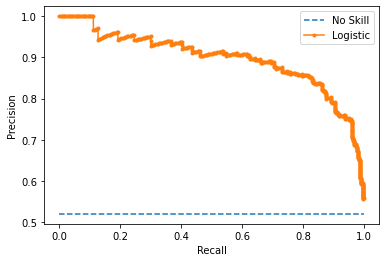

In [37]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Generally, the use of ROC curves and precision-recall curves are as follows:
> ROC curves should be used when there are roughly equal numbers of observations for
each class.

> Precision-Recall curves should be used when there is a moderate to large class imbalance.

#### How to Calibrate Predicted Probabilities

A reliability diagram is a line plot of the relative frequency of what was observed (y-axis) versus
the predicted probability frequency (x-axis).

Below the diagonal: The model has over-forecast; the probabilities are too large.
Above the diagonal: The model has under-forecast; the probabilities are too small.

"*Reliability diagrams provide a diagnostic to check whether the forecast value Xi is
reliable. Roughly speaking, a probability forecast is reliable if the event actually
happens with an observed relative frequency consistent with the forecast value.*"

Calibration of prediction probabilities is a rescaling operation that is applied after the
predictions have been made by a predictive model. There are two popular approaches to
calibrating probabilities; they are the Platt Scaling and Isotonic Regression. Platt Scaling is
simpler and is suitable for reliability diagrams with the S-shape. Isotonic Regression is more
complex, requires a lot more data (otherwise it may overfit), but can support reliability diagrams
with different shapes (is nonparametric).

Platt Scaling is most effective when the distortion in the predicted probabilities is
sigmoid-shaped. Isotonic Regression is a more powerful calibration method that can
correct any monotonic distortion. Unfortunately, this extra power comes at a price.
A learning curve analysis shows that Isotonic Regression is more prone to overfitting,
and thus performs worse than Platt Scaling, when data is scarce.

**Note, and this is really important: better calibrated probabilities may or may not lead
to better class-based or probability-based predictions. It really depends on the specific metric
used to evaluate predictions. In fact, some empirical results suggest that the algorithms that
can benefit the more from calibrating predicted probabilities include SVMs, bagged decision
trees, and random forests.**

Diagnose Calibration

You can diagnose the calibration of a classifier by creating a reliability diagram of the actual
probabilities versus the predicted probabilities on a test set. In scikit-learn, this is called a
calibration curve. This can be implemented by first calculating the calibration curve()
function. This function takes the true class values for a dataset and the predicted probabilities
for the main class (class = 1). The function returns the true probabilities for each bin and
the predicted probabilities for each bin. The number of bins can be specified via the n bins
argument and default to 5. 

Calibrate Classifier:

A classifier can be calibrated in scikit-learn using the CalibratedClassifierCV class. There
are two ways to use this class: prefit and cross-validation. You can fit a model on a training
dataset and calibrate this prefit model using a hold out validation dataset.

Alternately, the CalibratedClassifierCV can fit multiple copies of the model using k-fold
cross-validation and calibrate the probabilities predicted by these models using the hold out set.
Predictions are made using each of the trained models.

The CalibratedClassifierCV class supports two types of probability calibration; specific-
cally, the parametric `sigmoid' method (Platt's method) and the nonparametric `isotonic'
method which can be specified via the method argument.

We can make the discussion of calibration concrete with some worked examples. In these
examples, we will fit a support vector machine (SVM) to a noisy binary classification problem
and use the model to predict probabilities, then review the calibration using a reliability
diagram and calibrate the classifier and review the result. SVM is a good candidate model to
calibrate because it does not natively predict probabilities, meaning the probabilities are often
uncalibrated.

A note on SVM: probabilities can be predicted by calling the decision function()
function on the fit model instead of the usual predict proba() function. The probabilities
are not normalized, but can be normalized when calling the calibration curve() function by
setting the normalize argument to True. The example below fits an SVM model on the test
problem, predicted probabilities, and plots the calibration of the probabilities as a reliability
diagram,

In [2]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

In [3]:
X,y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

In [4]:
model = SVC(gamma='scale')
model.fit(trainX,trainy)

SVC()

In [5]:
probs = model.decision_function(testX)

In [6]:
#relatablity diagram
fop, mpv = calibration_curve(testy,probs,n_bins=10,normalize=True)

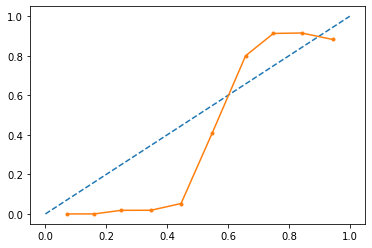

In [8]:
# plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle='--')
# plot model reliability
plt.plot(mpv, fop, marker='.')
plt.show()

Running the example creates a reliability diagram showing the calibration of the SVMs
predicted probabilities (solid line) compared to a perfectly calibrated model along the diagonal
of the plot (dashed line.) We can see the expected S-shaped curve of a conservative forecast.

We can update the example to fit the SVM via the CalibratedClassifierCV class using
5-fold cross-validation, using the holdout sets to calibrate the predicted probabilities.

In [9]:
from sklearn.calibration import CalibratedClassifierCV

In [10]:
model = SVC(gamma="scale")
calibrated = CalibratedClassifierCV(model,method='sigmoid',cv=5)
calibrated.fit(trainX,trainy)

CalibratedClassifierCV(base_estimator=SVC(), cv=5)

In [11]:
probs = calibrated.predict_proba(testX)[:,1]

In [13]:
#reliablity diagram
fop,mpv = calibration_curve(testy,probs,n_bins=10,normalize=True)

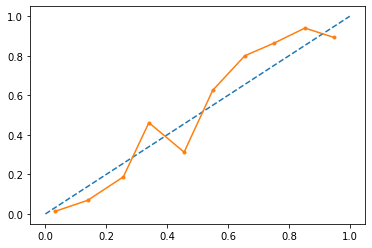

In [14]:
# plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle='--')
# plot model reliability
plt.plot(mpv, fop, marker='.')
plt.show()

Running the example creates a reliability diagram for the calibrated probabilities. The shape
of the calibrated probabilities is different, hugging the diagonal line much better, although still
under-forecasting in the upper quadrant. Visually, the plot suggests a better calibrated model.

*Predicted probabilities that match the expected distribution of probabilities for each class
are referred to as calibrated.*